---
# Logistic Regression

---

Before we start coding let us first understand or atleast try to understand the things happening at the back-end of Logistic Regression. The aim of this section, **Logistic Regression behind the mask** is to explain the math behind Logistic Regression and to accomplish the first objective of this kernel. To be able to do this we must answer the question, how does a Logistic Regression work? In theory, a Logistic regression takes input and returns an output of probability, a value between 0 and 1. How does a Logistic Regression do that? With the help of a function called a *logistic function* or most commonly known as a *sigmoid*. This sigmoid function is reponsible for *predicting* or classifying a given input.
Logistic function or sigmoid is defined as:
![](https://imgur.com/Bw5gMJX.jpg)
Where:
* *e* = Euler's number which is **2.71828**.
* *x0* = the value of the sigmoid's midpoint on the x-axis.
* *L* = the maximum value.
* *k* = steepness of the curve.

For Logistic Regression however here is the definition of the logistic function:<br>
![](https://imgur.com/903IYoN.jpg)
Where:
* Θ = is the weight.

### Linear Regression Vs. Logistic Regression

Linear regression gives you a continuous output, but logistic regression provides a constant output. An example of the continuous output is house price and stock price. Example's of the discrete output is predicting whether a patient has cancer or not, predicting whether the customer will churn. Linear regression is estimated using Ordinary Least Squares (OLS) while logistic regression is estimated using Maximum Likelihood Estimation (MLE) approach.

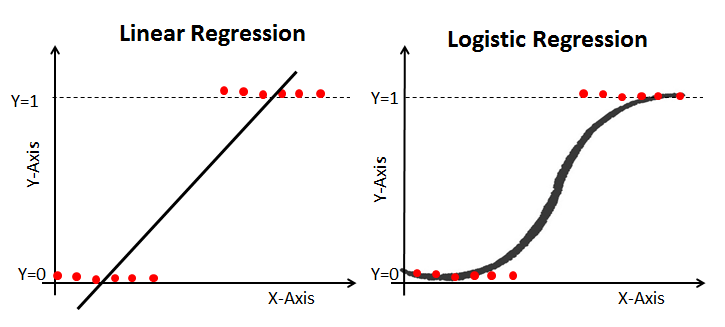

### Maximum Likelihood Estimation Vs. Least Square Method

The MLE is a "likelihood" maximization method, while OLS is a distance-minimizing approximation method. Maximizing the likelihood function determines the parameters that are most likely to produce the observed data. From a statistical point of view, MLE sets the mean and variance as parameters in determining the specific parametric values for a given model. This set of parameters can be used for predicting the data needed in a normal distribution.

Ordinary Least squares estimates are computed by fitting a regression line on given data points that has the minimum sum of the squared deviations (least square error). Both are used to estimate the parameters of a linear regression model. MLE assumes a joint probability mass function, while OLS doesn't require any stochastic assumptions for minimizing distance.

### Sigmoid Function

The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO. The outputcannotFor example: If the output is 0.75, we can say in terms of probability as: There is a 75 percent chance that patient will suffer from cancer.

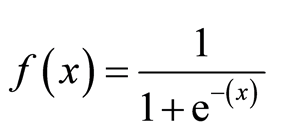

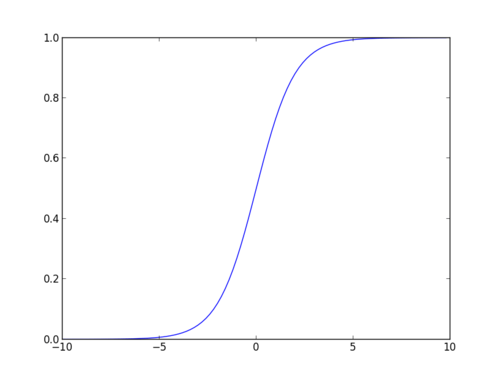

## Data Description


* _Daily Time Spent on Site_: consumer time on site in minutes
* _Age_: cutomer age in years
* _Area Income_: Avg. Income of geographical area of consumer
* _Daily Internet Usage_: Avg. minutes a day consumer is on the internet
* _Ad Topic Line_: Headline of the advertisement
* _City_: City of consumer
* _Male_: Whether or not consumer was male
* _Country_: Country of consumer
* _Timestamp_: Time at which consumer clicked on Ad or closed window
* _Clicked on Ad_: 0 or 1 indicated clicking on Ad

## Task

In this project,I will build logistic model from scratch use to predict whether or not a particular internet user has clicked on an Advertisement.The goal is to predict if a user would click on an advertisement based on the features of the user.
I also will use the logistic model 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('advertising.csv') 

In [8]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


### Data Analysis

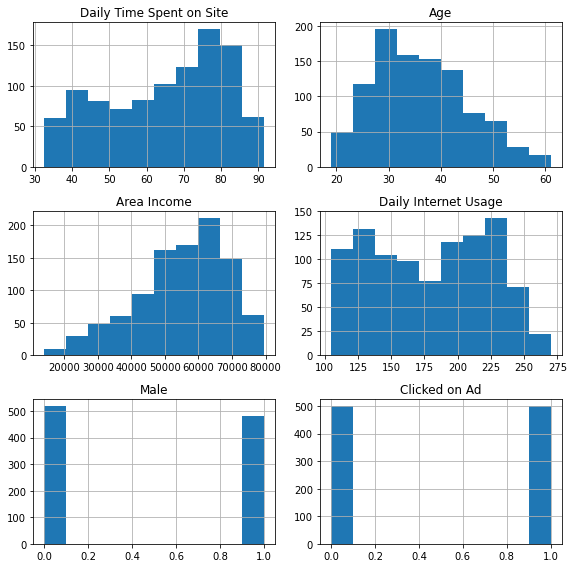

In [10]:
# View the distributions using histograms to get a sense of the spread of the various features.


data.hist(figsize = (8,8))
plt.tight_layout()
plt.show()

C:\Users\wangj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

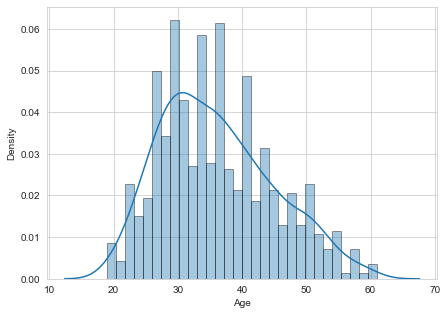

In [11]:
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.distplot(data['Age'], bins = 30, kde=True, hist_kws=dict(edgecolor="black", linewidth=1))

In [12]:
data.isnull().count()

Daily Time Spent on Site    1000
Age                         1000
Area Income                 1000
Daily Internet Usage        1000
Ad Topic Line               1000
City                        1000
Male                        1000
Country                     1000
Timestamp                   1000
Clicked on Ad               1000
dtype: int64

In [13]:
# Get number of missing values in each column
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [14]:
data.duplicated().sum()

0

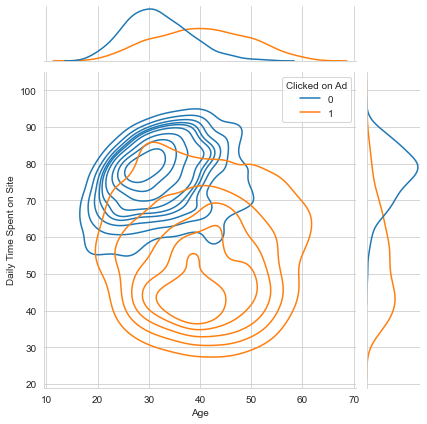

In [15]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data= data, hue='Clicked on Ad',kind='kde')

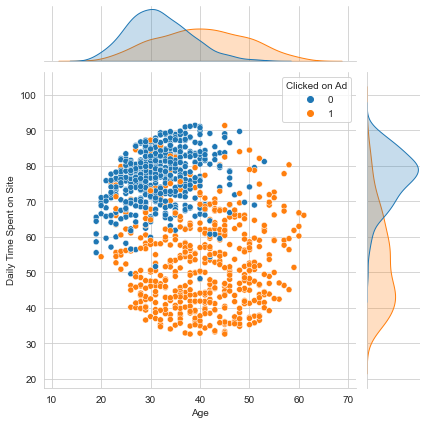

In [16]:
sns.jointplot(x = "Age", y= "Daily Time Spent on Site",hue='Clicked on Ad', data = data) 

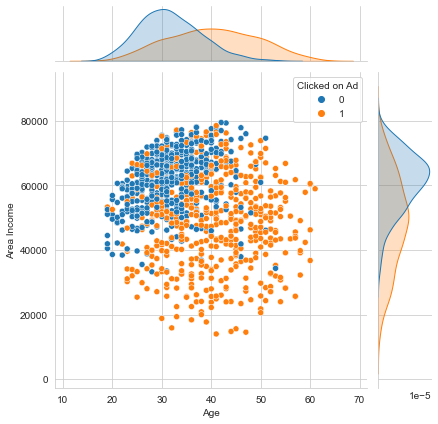

In [17]:
sns.jointplot(x='Age',y='Area Income',data=data,hue='Clicked on Ad')

C:\Users\wangj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Male=1, Female =0')

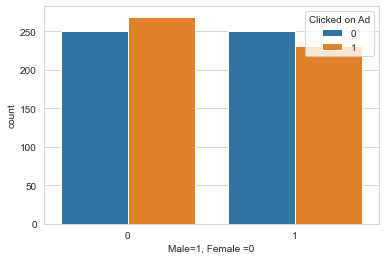

In [18]:
sns.countplot(data['Male'],hue = data['Clicked on Ad'])
plt.xlabel('Male=1, Female =0')



Clearly there are 2 groups of people mostly clicking on the advertisement

people more than age of 40
people less than age of 40 and spending less time on site

<Figure size 720x720 with 0 Axes>

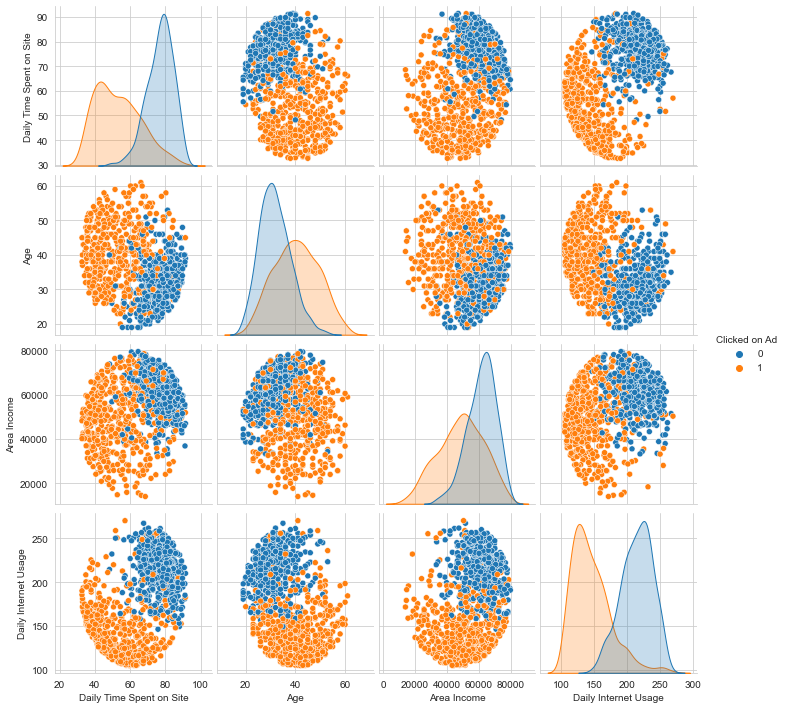

In [19]:
plt.figure(figsize=(10, 10))
sns.pairplot(
    data,
    hue ='Clicked on Ad',
    vars=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'],
    diag_kind='kde',
    
)
plt.show()

<AxesSubplot:>

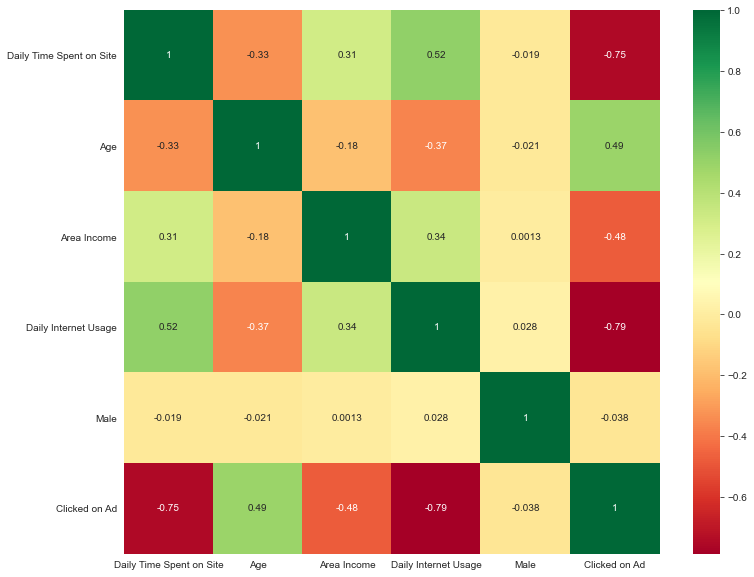

In [20]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), annot = True, cmap='RdYlGn') 

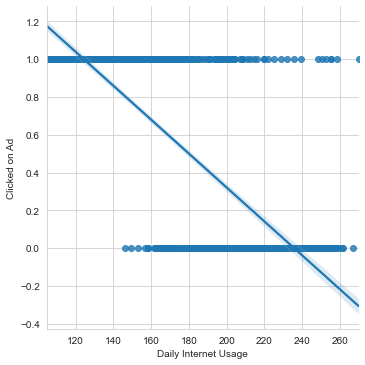

In [21]:
sns.lmplot(x="Daily Internet Usage", y="Clicked on Ad", data=data)

### Multivariable Logistic Regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
X = data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage']]
y = data['Clicked on Ad']

In [24]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,68.95,35,61833.90,256.09
1,80.23,31,68441.85,193.77
2,69.47,26,59785.94,236.50
3,74.15,29,54806.18,245.89
4,68.37,35,73889.99,225.58
...,...,...,...,...
995,72.97,30,71384.57,208.58
996,51.30,45,67782.17,134.42
997,51.63,51,42415.72,120.37
998,55.55,19,41920.79,187.95


In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [27]:
logistic = LogisticRegression()


In [28]:
logistic.fit(X_train, y_train)


LogisticRegression()

In [29]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train,logistic.predict(X_train)))

Train - Accuracy : 0.9


### Prediction & Evaluations

In [30]:
y_pred = logistic.predict(X_test)

In [ ]:
#### Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Confusion matrix for Logistic Regression')

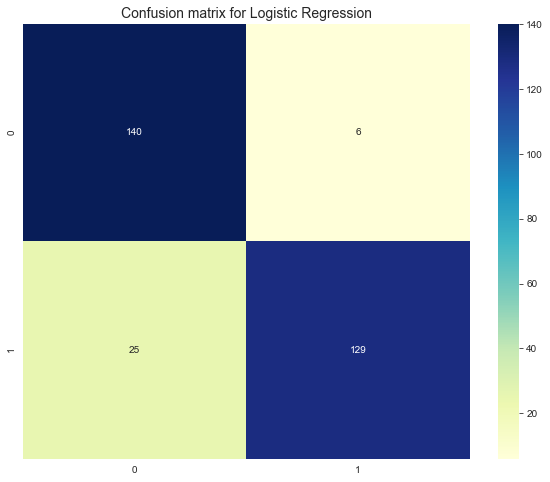

In [31]:
fig = plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='g',cmap="YlGnBu")
plt.title('Confusion matrix for Logistic Regression',fontsize=14)

#### Classification Report for the model

In [32]:
cr = classification_report(y_test, y_pred,target_names=['Not Clicked','Clicked'])
print(cr)

              precision    recall  f1-score   support

 Not Clicked       0.85      0.96      0.90       146
     Clicked       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [ ]:
#### ROC Curve

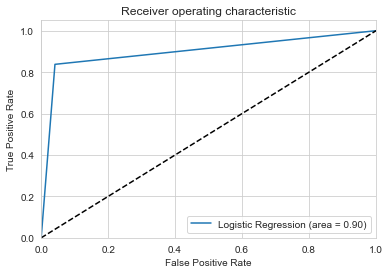

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Build a logistic regression model from scratch

In [59]:
 
class LR:
     
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
     
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
     
    def loss_func(self,X, y, weights):                 
        m =len(X)                
        yhat = sigmoid(np.dot(X, weights))        
        predict_1 = y * np.log(yhat)
        predict_0 = (1 - y) * np.log(1 - yhat)        
        return -sum(predict_1 + predict_0) / m
     
    def fit(self,X,y,epochs=25,learning_rate=0.05):
        loss = []
         
        X = self.add_intercept(X)
         
        weights = np.random.rand(X.shape[1])
        N = len(X)
 
        for _ in range(epochs):
            z = np.dot(X,weights)
            y_hat = sigmoid(z)
            weights -= learning_rate * (X.T @ (y_hat-y))/N
            loss.append(self.loss_func(X,y,weights))
        self.weights = weights
        self.loss = loss
         
    def predict(self, X): 
        X = self.add_intercept(X)
        z = np.dot(X, self.weights)
        #Binary result
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

In [77]:
logreg = LR()
logreg.fit(X_train, y_train,epochs = 200,learning_rate = 0.7)

<ipython-input-52-c9fad1379be2>:11: RuntimeWarning: overflow encountered in exp
  s = 1.0 / (1.0 + np.exp(-z))
<ipython-input-59-8bd6d7129ba1>:13: RuntimeWarning: divide by zero encountered in log
  predict_1 = y * np.log(yhat)
<ipython-input-59-8bd6d7129ba1>:14: RuntimeWarning: divide by zero encountered in log
  predict_0 = (1 - y) * np.log(1 - yhat)


In [78]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train,logreg.predict(X_train)))

Train - Accuracy : 0.5057142857142857


<ipython-input-59-8bd6d7129ba1>:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


**The trainning accuracy score only 0.51, we need to scale our training data.**

In [67]:
from sklearn.preprocessing import StandardScaler

In [69]:
Scaler= StandardScaler()

In [82]:
X_train_scale = Scaler.fit_transform(X_train) 
X_test_scale = Scaler.fit_transform(X_test)

In [79]:
logreg = LR()
logreg.fit(X_train_scale, y_train,epochs = 200,learning_rate = 0.7)

In [80]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train,logreg.predict(X_train_scale)))

Train - Accuracy : 0.97


In [83]:
y_pred_new = logreg.predict(X_test_scale)

#### Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Confusion matrix for Logistic Regression build from scratch')

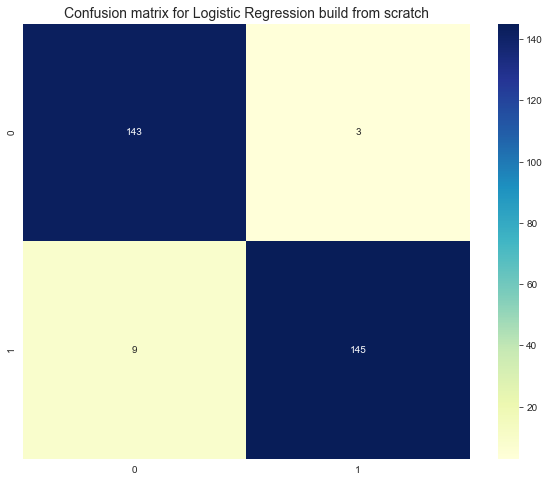

In [89]:
fig = plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test, y_pred_new)
sns.heatmap(cm,annot=True,fmt='g',cmap="YlGnBu")
plt.title('Confusion matrix for Logistic Regression build from scratch',fontsize=14)

#### Classification Report for the model

In [85]:
cr_new = classification_report(y_test, y_pred,target_names=['Not Clicked','Clicked'])
print(cr)

              precision    recall  f1-score   support

 Not Clicked       0.85      0.96      0.90       146
     Clicked       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



#### ROC Curve

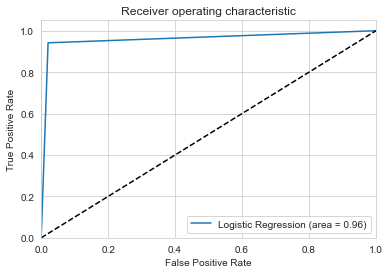

In [86]:
logit_roc_auc = roc_auc_score(y_test, y_pred_new)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_new)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Conclusion

Comparing the predict results of model imported from  scikit learn and the model I built from scratch, I found both these have an predict accuracy score with 0.9. The later one even has a better reult than the former. My model predicts 143 true negative and 145 true positive results; while the scikit learn model has a 140 true negative and 129 true positive results. 
